In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import hiveline as hl
import geopandas as gpd
import pandas as pd
import osmnx as ox

In [2]:
place_name = 'Eindhoven, Netherlands'
year = '2020'
city = hl.Place(place_name, year)

Data found in db


In [3]:
# add surrounding cities
country = 'Netherlands'
place_names = ['Son en Breugel', 'Nuenen', 'Geldrop-Mierlo', 'Helmond', 'Heeze-Leende', 'Waalre', 'Veldhoven', 'Eersel', 'Oirschot', 'Best']
place_names = [p+', '+country for p in place_names]
city.merge_places('Eindhoven suburbs, Netherlands', place_names)

Data not in db, computing
chunk 0
Data not in db, computing
chunk 0
Data not in db, computing
chunk 0
Data not in db, computing
chunk 0
Data not in db, computing
chunk 0
Data not in db, computing
chunk 0
Data not in db, computing
chunk 0
Data not in db, computing
chunk 0
Data not in db, computing
chunk 0
Data not in db, computing
chunk 0


In [5]:
city.load_all()

Data not in db, computing
chunk 0
chunk 1
chunk 2
chunk 3
Data not in db, computing
chunk 0
chunk 1
chunk 2
chunk 3
Data not in db, computing
chunk 0
chunk 1
chunk 2
chunk 3


/home/nicod/.local/lib/python3.10/site-packages/geopandas/geodataframe.py:1442: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


In [ ]:
city.plot_zoning(['population'], save_name='population')#save_name='zoning'

/home/nicod/.local/lib/python3.10/site-packages/geopandas/plotting.py:642: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(
/home/nicod/.local/lib/python3.10/site-packages/geopandas/plotting.py:642: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(
/home/nicod/.local/lib/python3.10/site-packages/geopandas/plotting.py:642: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(
/home/nicod/.local/lib/python3.10/site-packages/geopandas/plotting.py:642: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(
/home/nicod/.local/lib/python3.10/site-packages/geopandas/plotting.py:642: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(
/home/nicod/.local/lib/python3.10/s

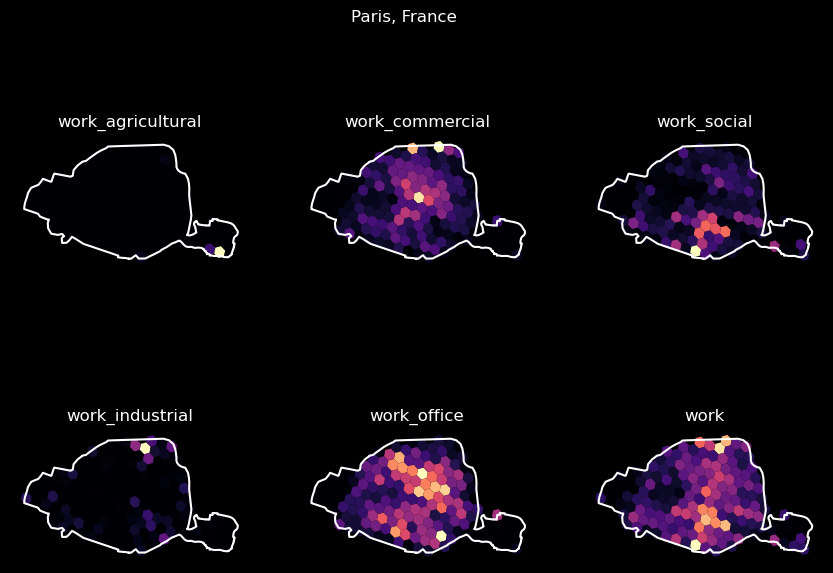

In [9]:
city.plot_zoning([i for i in city.data.columns if 'work' in i], save_name='work_types')

## Folium

In [8]:
plotter = hl.CityPlotter(city, zoom=11)
plotter.add_hex_heatmap('population')
plotter.add_city_shape()
plotter.show_map()

/media/nicod/Documents/Codagon/hiveline/examples/../hiveline/plotting/map.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap(colormap_name)


In [91]:
plotter.export_to_png(filename='dublin_region_population', tall_city=True)

In [9]:
# bulk export
for col in city.data.drop(columns=['h3', 'geometry', 'nuts3']).columns:
    plotter = hl.CityPlotter(city, zoom=11)
    plotter.add_hex_heatmap(col)
    plotter.add_city_shape()
    plotter.export_to_png(filename='eindhoven_suburbs_'+col, tall_city=False)

/media/nicod/Documents/Codagon/hiveline/examples/../hiveline/plotting/map.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap(colormap_name)
/tmp/ipykernel_729585/804605748.py:6: ResourceWarning: unclosed <socket.socket fd=86, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 44346), raddr=('127.0.0.1', 36709)>
  plotter.export_to_png(filename='eindhoven_suburbs_'+col, tall_city=False)
/media/nicod/Documents/Codagon/hiveline/examples/../hiveline/plotting/map.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap(colormap_name)
/tmp/ipykernel_729585/804605748.py:6: 

## Roads from OSMnx

In [46]:
roads = ox.graph_from_place('Paris, France', network_type='drive', simplify=False, custom_filter='["highway"~"primary"]'
)

In [48]:
roads_gdf = ox.utils_graph.graph_to_gdfs(roads, nodes=False)

<Axes: >

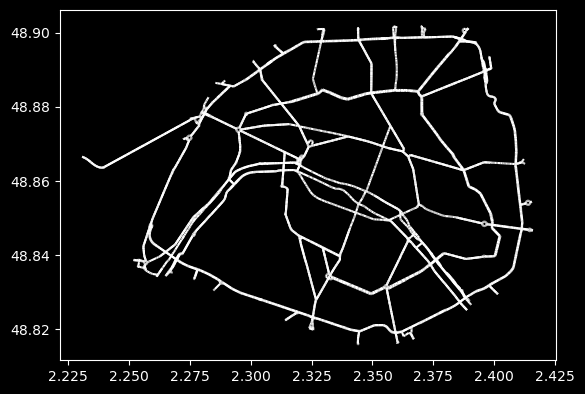

In [49]:
roads_gdf.plot()

/home/nicod/.local/lib/python3.10/site-packages/geopandas/plotting.py:642: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


<Axes: >

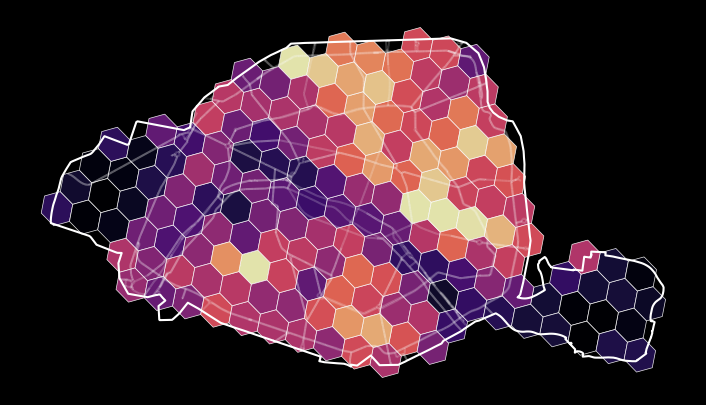

In [52]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
city.shape.boundary.plot(ax=ax, color='white', zorder=2)
ax.set_axis_off()
city.data.plot(ax=ax, zorder=0, column='population', alpha=0.9, edgecolor="#FFFFFF", linewidth =0.5, colormap='magma')
roads_gdf.plot(ax=ax, zorder=1, color='#FFFFFF33')